## Punto 1 – Esplorazione del dataset e metadati


In [1]:
import pandas as pd
import numpy as np


In [2]:
url = "https://raw.githubusercontent.com/owid/covid-19-data/refs/heads/master/public/data/owid-covid-data.csv"
df = pd.read_csv(url)


verifico se i dati sono caricati

In [3]:
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


Dimensioni del dataset (Punto 1 della consegna)

In [4]:
df.shape


(429435, 67)

Struttura e tipi delle colonne (metadati)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

Il dataset è composto da osservazioni giornaliere relative alla diffusione del COVID-19 a livello globale.
Sono presenti numerose variabili sanitarie e demografiche; molte colonne contengono valori mancanti poiché non tutte le informazioni sono disponibili per ogni paese o per ogni data.


Capire continent e location

In [6]:
df[['continent', 'location']].drop_duplicates().head(20)


,continent,location
0,Asia,Afghanistan
1674,NaN,Africa
3348,Europe,Albania
5022,Africa,Algeria
6696,Oceania,American Samoa
8370,Europe,Andorra
10044,Africa,Angola
11718,North America,Anguilla
13392,North America,Antigua and Barbuda
15066,South America,Argentina


La colonna `location` include sia singoli stati sia entità aggregate (come continenti, gruppi economici e il totale mondiale).
La colonna `continent` è valorizzata solo per i singoli stati, mentre risulta nulla per le aggregazioni.


> **Nota metodologica:** in linea con le indicazioni fornite, durante l’analisi è stata posta particolare attenzione alla corretta interpretazione delle colonne `continent` e `location`, che includono sia dati puntuali sia aggregazioni, e alla distinzione concettuale tra le variabili `new_cases` e `total_cases`, trattate secondo la loro diversa natura.


## **Punto 2 – Analisi dei casi per continente**


Selezione delle righe dei continenti

In [7]:
continents_df = df[
    (df['continent'].isna()) &
    (df['location'].isin([
        'Africa',
        'Asia',
        'Europe',
        'North America',
        'South America',
        'Oceania'
    ]))
]


In [8]:
continents_df['location'].unique()





array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'], dtype=object)

Ultimo valore disponibile (casi totali)

In [9]:
continent_cases = (
    continents_df
    .sort_values('date')
    .groupby('location')['total_cases']
    .last()
    .reset_index()
)


In [10]:
continent_cases


,location,total_cases
0,Africa,13145380.0
1,Asia,301499099.0
2,Europe,252916868.0
3,North America,124492666.0
4,Oceania,15003352.0
5,South America,68809418.0


Totale mondiale dei casi

In [11]:
world_cases = (
    df[df['location'] == 'World']
    .sort_values('date')
    ['total_cases']
    .dropna()
    .iloc[-1]
)

Calcolo percentuali

In [12]:
continent_cases['percentage_world'] = (
    continent_cases['total_cases'] / world_cases * 100
)

continent_cases['percentage_world'] = continent_cases['percentage_world'].round(2)
continent_cases


,location,total_cases,percentage_world
0,Africa,13145380.0,1.69
1,Asia,301499099.0,38.86
2,Europe,252916868.0,32.60
3,North America,124492666.0,16.05
4,Oceania,15003352.0,1.93
5,South America,68809418.0,8.87


Arrotono per renderlo piu leggibile

In [13]:
continent_cases = (
    continents_df
    .sort_values('date')
    .groupby('location')['total_cases']
    .last()
    .reset_index()
)

continent_cases['percentage_world'] = (
    continent_cases['total_cases'] / world_cases * 100
).round(2)


Ordinamento

In [14]:
continent_cases = continent_cases.sort_values(
    by='total_cases',
    ascending=False
)

continent_cases



,location,total_cases,percentage_world
1,Asia,301499099.0,38.86
2,Europe,252916868.0,32.60
3,North America,124492666.0,16.05
5,South America,68809418.0,8.87
4,Oceania,15003352.0,1.93
0,Africa,13145380.0,1.69


Per evitare duplicazioni e aggregazioni scorrette, per ciascun continente è stato considerato esclusivamente l’ultimo valore cumulativo disponibile della variabile `total_cases`, che rappresenta il numero totale di casi registrati fino alla fine del periodo osservato.


L’analisi mostra una distribuzione non uniforme dei casi di COVID-19 tra i continenti.
Asia ed Europa risultano avere il numero più elevato di casi totali, mentre Oceania presenta un’incidenza significativamente inferiore.
Le percentuali sono calcolate rispetto al totale mondiale dei casi registrati.


## **Punto 3 – Analisi dei casi in Italia nel 2022**


Filtro Italia

In [15]:
italy_df = df[df['location'] == 'Italy'].copy()


In [16]:
italy_df[['location']].drop_duplicates()


,location
185275,Italy


Conversione della data

In [17]:
italy_df['date'] = pd.to_datetime(italy_df['date'])


Filtro anno 2022

In [18]:
italy_2022 = italy_df[
    (italy_df['date'] >= '2022-01-01') &
    (italy_df['date'] <= '2022-12-31')
].copy()


In [19]:
italy_2022['date'].min(), italy_2022['date'].max()


(Timestamp('2022-01-01 00:00:00'), Timestamp('2022-12-31 00:00:00'))

Gestione dei giorni senza misurazioni,
filtro solo sui giorni con misurazione reale:

In [20]:
italy_2022_measured = italy_2022[
    italy_2022['new_cases'].notna()
].copy()


Grafico 1: evoluzione dei casi totali

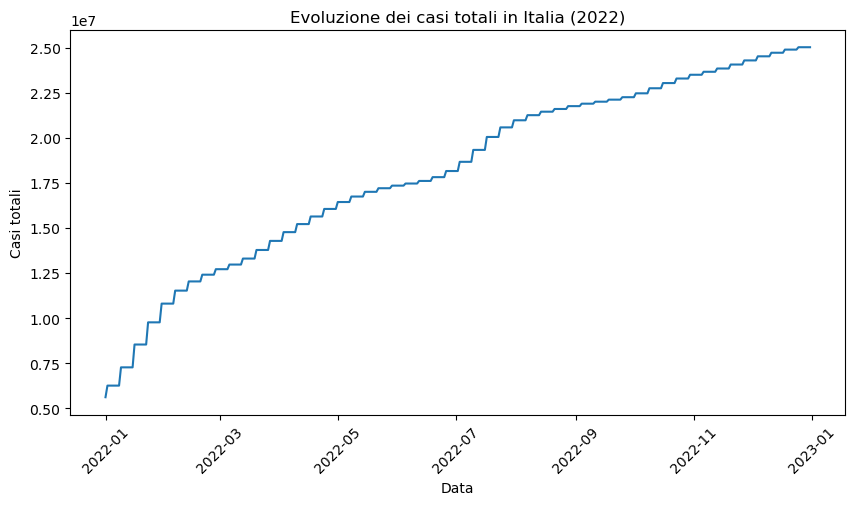

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(
    italy_2022_measured['date'],
    italy_2022_measured['total_cases']
)
plt.title('Evoluzione dei casi totali in Italia (2022)')
plt.xlabel('Data')
plt.ylabel('Casi totali')
plt.xticks(rotation=45)
plt.show()


Grafico 2: nuovi casi nel tempo

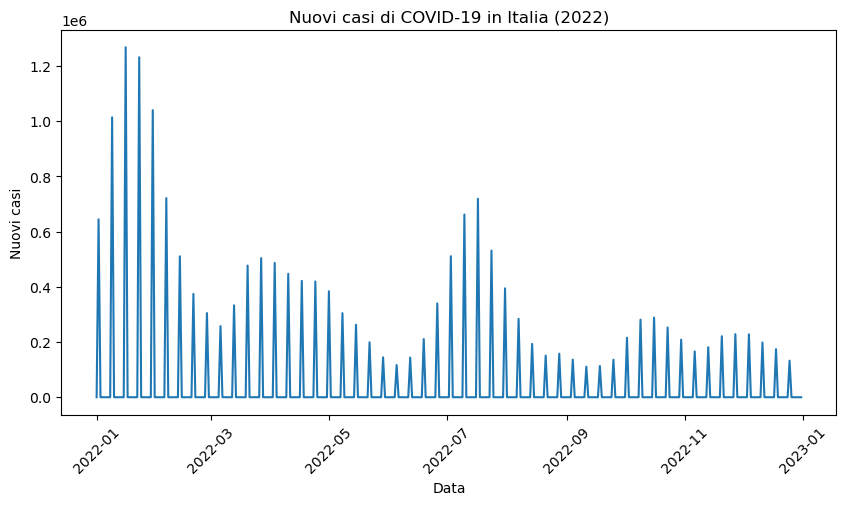

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(
    italy_2022_measured['date'],
    italy_2022_measured['new_cases']
)
plt.title('Nuovi casi di COVID-19 in Italia (2022)')
plt.xlabel('Data')
plt.ylabel('Nuovi casi')
plt.xticks(rotation=45)
plt.show()


Nel corso del 2022 si osserva una crescita continua dei casi totali in Italia, con incrementi più marcati in specifici periodi dell’anno.
Il numero di nuovi casi mostra un andamento irregolare, coerente con la rilevazione settimanale dei dati.


Poiché i nuovi casi di COVID-19 nel dataset vengono registrati con frequenza prevalentemente settimanale, sono stati esclusi dall’analisi i giorni privi di misurazioni, al fine di evitare distorsioni nell’interpretazione dell’andamento temporale.


## **Punto 4 – Confronto dei pazienti in terapia intensiva (Italia, Germania e Francia)**


Selezione dei paesi

In [23]:
icu_countries = df[
    df['location'].isin(['Italy', 'Germany', 'France'])
].copy()


In [24]:
icu_countries['location'].unique()


array(['France', 'Germany', 'Italy'], dtype=object)

Conversione della data

In [25]:
icu_countries['date'] = pd.to_datetime(icu_countries['date'])


Filtro temporale (mag 2022 → apr 2023)

In [26]:
icu_period = icu_countries[
    (icu_countries['date'] >= '2022-05-01') &
    (icu_countries['date'] <= '2023-04-30')
].copy()


In [27]:
icu_period['date'].min(), icu_period['date'].max()


(Timestamp('2022-05-01 00:00:00'), Timestamp('2023-04-30 00:00:00'))

Selezione dati ICU validi

In [28]:
icu_period_clean = icu_period[
    icu_period['icu_patients'].notna()
].copy()


Boxplot comparativo

<Figure size 800x500 with 0 Axes>

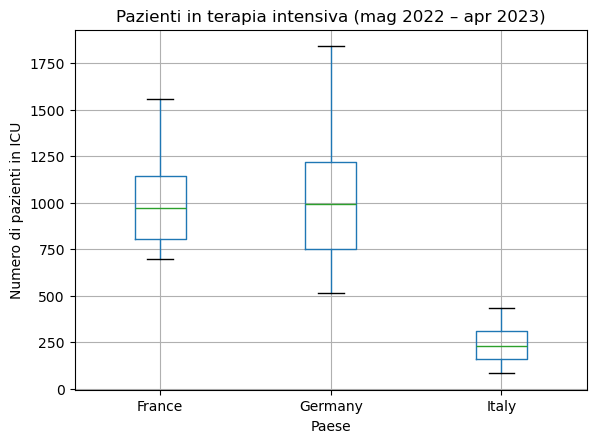

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

icu_period_clean.boxplot(
    column='icu_patients',
    by='location'
)

plt.title('Pazienti in terapia intensiva (mag 2022 – apr 2023)')
plt.suptitle('')
plt.xlabel('Paese')
plt.ylabel('Numero di pazienti in ICU')

plt.show()


Dal boxplot emerge una differenza significativa tra i tre paesi: la Germania presenta valori mediani più elevati di pazienti in terapia intensiva, mentre Italia e Francia mostrano livelli medi inferiori e una variabilità più contenuta nel periodo considerato.


## **Punto 5 – Pazienti ospedalizzati nel 2021 (Italia, Germania, Francia e Spagna)**


Selezione paesi

In [30]:
hosp_countries = df[
    df['location'].isin(['Italy', 'Germany', 'France', 'Spain'])
].copy()


In [31]:
hosp_countries['location'].unique()


array(['France', 'Germany', 'Italy', 'Spain'], dtype=object)

Conversione data

In [32]:
hosp_countries['date'] = pd.to_datetime(hosp_countries['date'])


Filtro anno 2021

In [33]:
hosp_2021 = hosp_countries[
    (hosp_countries['date'] >= '2021-01-01') &
    (hosp_countries['date'] <= '2021-12-31')
].copy()


In [34]:
hosp_2021['date'].min(), hosp_2021['date'].max()


(Timestamp('2021-01-01 00:00:00'), Timestamp('2021-12-31 00:00:00'))

Verifica valori nulli

In [35]:
hosp_2021[['location', 'hosp_patients']].isna().groupby(
    hosp_2021['location']
).sum()


,location,hosp_patients
location,,
France,0,0
Germany,0,365
Italy,0,0
Spain,0,0


In [36]:
hosp_2021.groupby('location')['hosp_patients'].count()


location
France     365
Germany      0
Italy      365
Spain      365
Name: hosp_patients, dtype: int64

Somma dei pazienti ospedalizzati

In [37]:
hosp_sum_2021 = (
    hosp_2021
    .groupby('location')['hosp_patients']
    .sum(min_count=1)  # se tutti NaN → NaN, non 0
    .reset_index()
)

hosp_sum_2021



,location,hosp_patients
0,France,6008717.0
1,Germany,NaN
2,Italy,4419950.0
3,Spain,2411706.0


Trattandosi di una variabile giornaliera e non cumulativa, la sostituzione dei valori mancanti nella colonna `hosp_patients` non risulterebbe metodologicamente corretta; pertanto, l’analisi è stata condotta considerando esclusivamente i dati effettivamente osservati.


## **Conclusioni e considerazioni finali**

Nel corso di questo progetto è stata condotta un’analisi esplorativa e descrittiva della diffusione del COVID-19 utilizzando il dataset di *Our World in Data*.  
Il lavoro ha incluso la verifica delle dimensioni e dei metadati del dataset, l’analisi dei casi a livello continentale, lo studio dell’andamento dei contagi in Italia nel 2022 e il confronto tra diversi Paesi europei in termini di pazienti in terapia intensiva e ospedalizzati.

Una delle principali difficoltà incontrate è stata la corretta interpretazione delle colonne `location` e `continent`, che nel dataset includono sia singoli Paesi sia entità aggregate (continenti, gruppi economici e totale mondiale).  
Questa criticità è stata risolta tramite un’attenta fase di EDA e mediante filtri espliciti, evitando duplicazioni o aggregazioni non corrette.

Un’ulteriore complessità ha riguardato la gestione dei valori mancanti, in particolare per le variabili `new_cases`, `icu_patients` e `hosp_patients`.  
Poiché si tratta di variabili giornaliere non cumulative, è stato scelto di non sostituire i valori nulli per evitare distorsioni nei risultati, limitando l’analisi ai dati effettivamente osservati.

Infine, la costruzione dei grafici e dei boxplot ha permesso di evidenziare differenze significative tra Paesi e periodi temporali, rafforzando l’importanza di una corretta pulizia e selezione dei dati prima di qualsiasi interpretazione.

Questo progetto ha permesso di consolidare competenze fondamentali di data analysis, in particolare nell’EDA, nella gestione dei dati mancanti e nella visualizzazione, sottolineando come la comprensione del contesto dei dati sia essenziale per produrre analisi corrette e affidabili.

